In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
plt.style.use('seaborn-v0_8')
sns.set_palette('coolwarm')


In [30]:
df = pd.read_csv(r'C:\Users\SAUMYA\Downloads\archive\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
df.info()
df.drop_duplicates(inplace=True)

Shape of dataset: (8807, 12)

Columns: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Missing values:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 

In [31]:
df['director'].fillna('Not Specified', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Specified', inplace=True)

print("After cleaning:")
df.isnull().sum()


After cleaning:


C:\Users\SAUMYA\AppData\Local\Temp\ipykernel_14516\2262450356.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Not Specified', inplace=True)
C:\Users\SAUMYA\AppData\Local\Temp\ipykernel_14516\2262450356.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

C:\Users\SAUMYA\AppData\Local\Temp\ipykernel_14516\882645641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


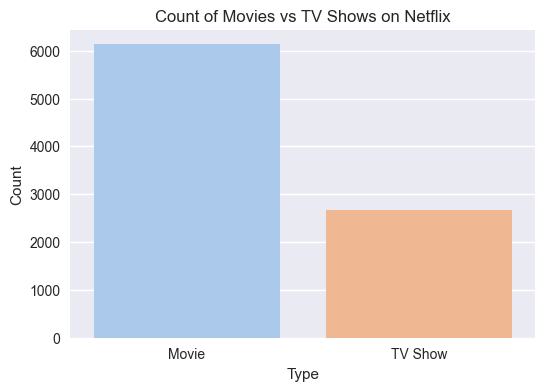

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


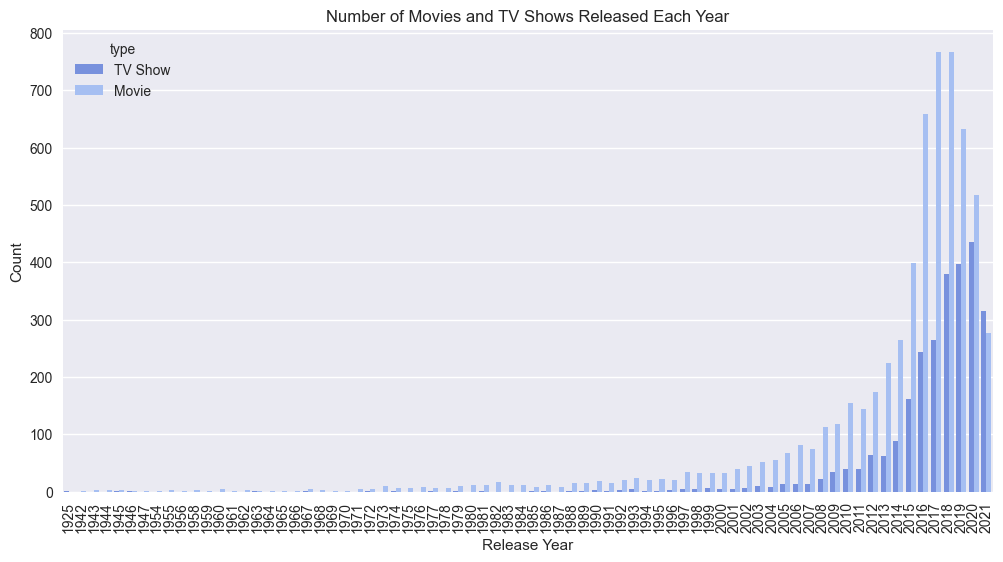

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', hue='type')
plt.title('Number of Movies and TV Shows Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


C:\Users\SAUMYA\AppData\Local\Temp\ipykernel_14516\2166934907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


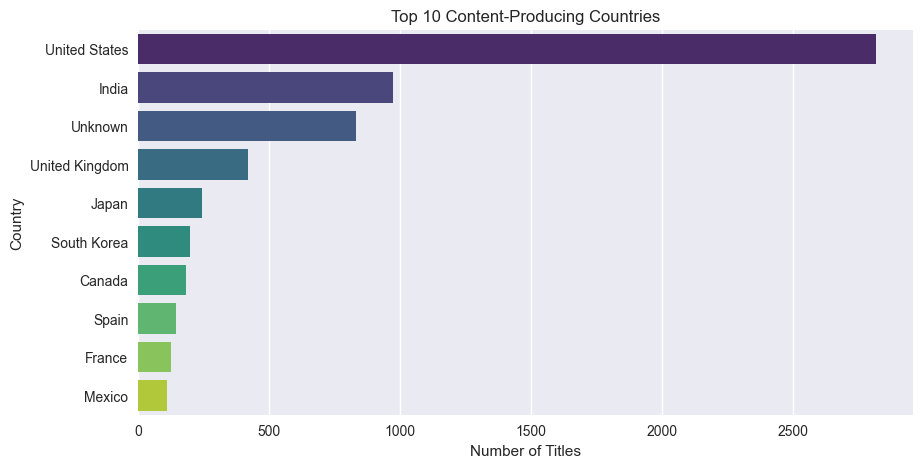

In [34]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


C:\Users\SAUMYA\AppData\Local\Temp\ipykernel_14516\3917794203.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_count, palette='cubehelix')


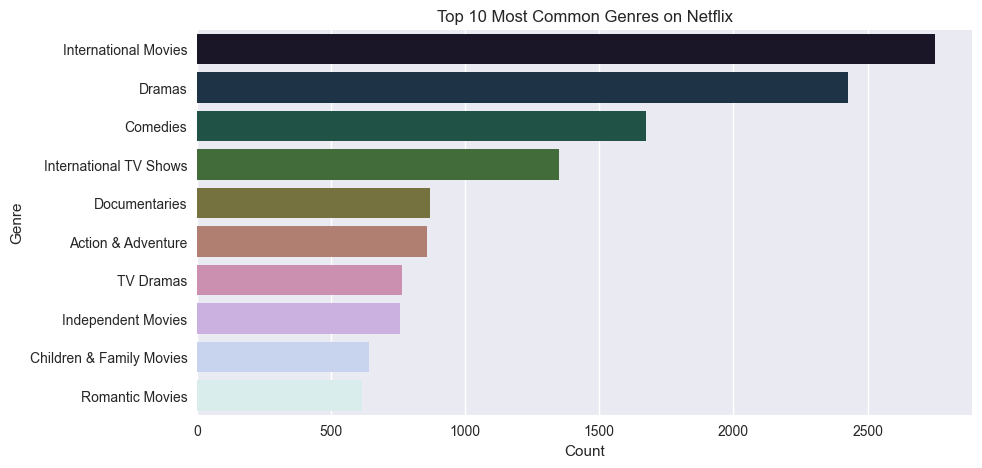

In [35]:
genres = df['listed_in'].dropna().str.split(', ')
all_genres = [genre for sublist in genres for genre in sublist]
genre_count = pd.DataFrame(Counter(all_genres).most_common(10), columns=['Genre','Count'])

plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='Genre', data=genre_count, palette='cubehelix')
plt.title('Top 10 Most Common Genres on Netflix')
plt.show()


C:\Users\SAUMYA\AppData\Local\Temp\ipykernel_14516\2304694573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')


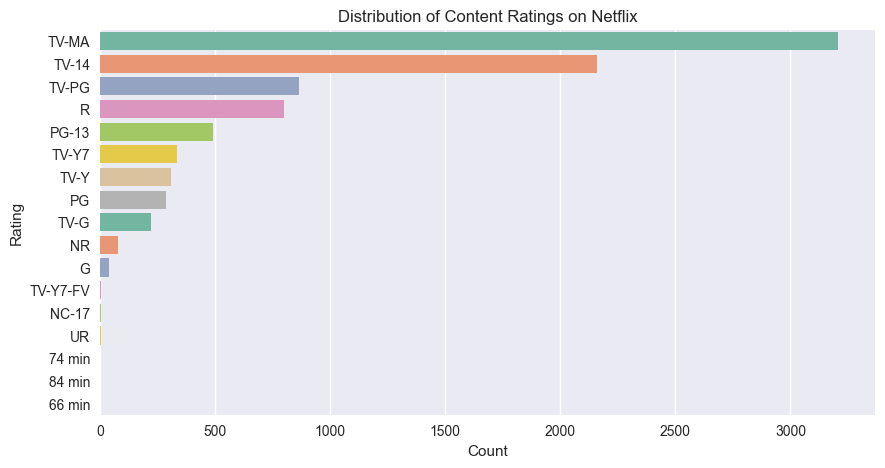

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


C:\Users\SAUMYA\AppData\Local\Temp\ipykernel_14516\4033097320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')


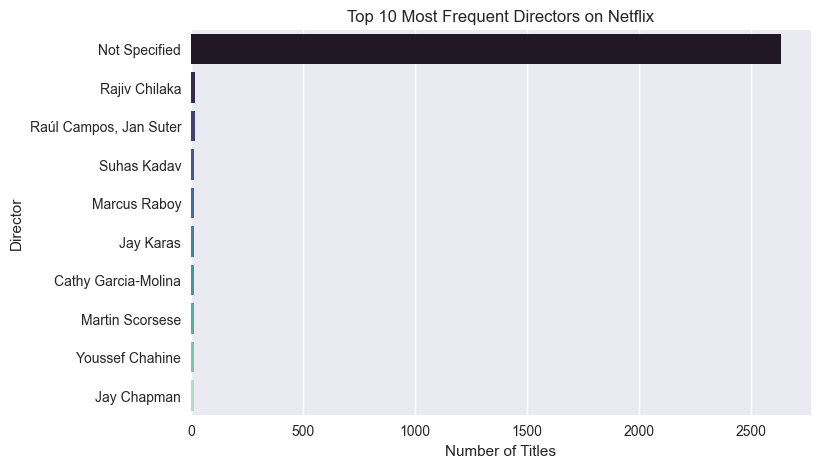

In [37]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='mako')
plt.title('Top 10 Most Frequent Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


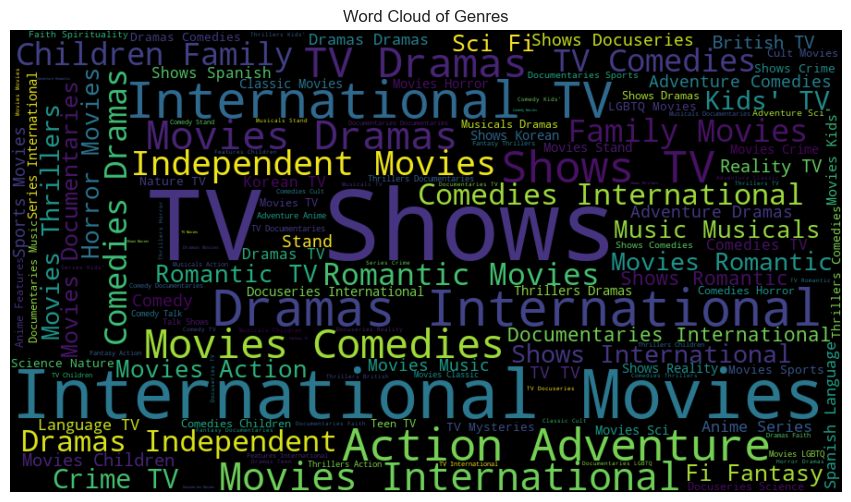

In [38]:
text = " ".join(df['listed_in'].dropna())
wordcloud = WordCloud(width=900, height=500, background_color='black').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()


In [39]:
print("✅ Key Insights:")
print("- Netflix has more Movies than TV Shows overall.")
print("- The number of TV Shows has increased in recent years.")
print("- The United States and India are the largest content producers.")
print("- Drama, Comedy, and Documentaries dominate Netflix’s catalog.")
print("- Most common content ratings are TV-MA and TV-14.")


✅ Key Insights:
- Netflix has more Movies than TV Shows overall.
- The number of TV Shows has increased in recent years.
- The United States and India are the largest content producers.
- Drama, Comedy, and Documentaries dominate Netflix’s catalog.
- Most common content ratings are TV-MA and TV-14.
